                         R2      RMSE       MAE
Linear Regression  0.935861  0.249040  0.149336
Ridge Regression   0.926687  0.266256  0.164075
Lasso Regression   0.810270  0.428328  0.313810
Random Forest      0.949577  0.220813  0.123273
Gradient Boosting  0.931514  0.257342  0.182501


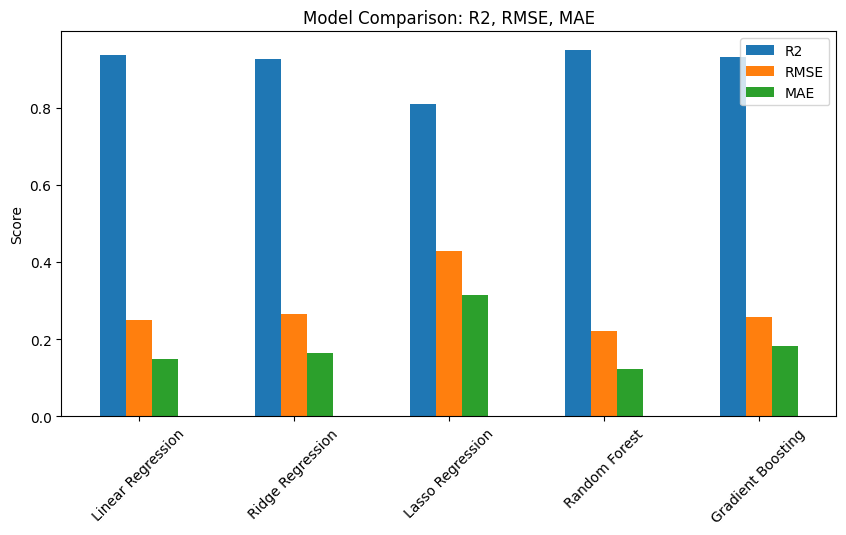

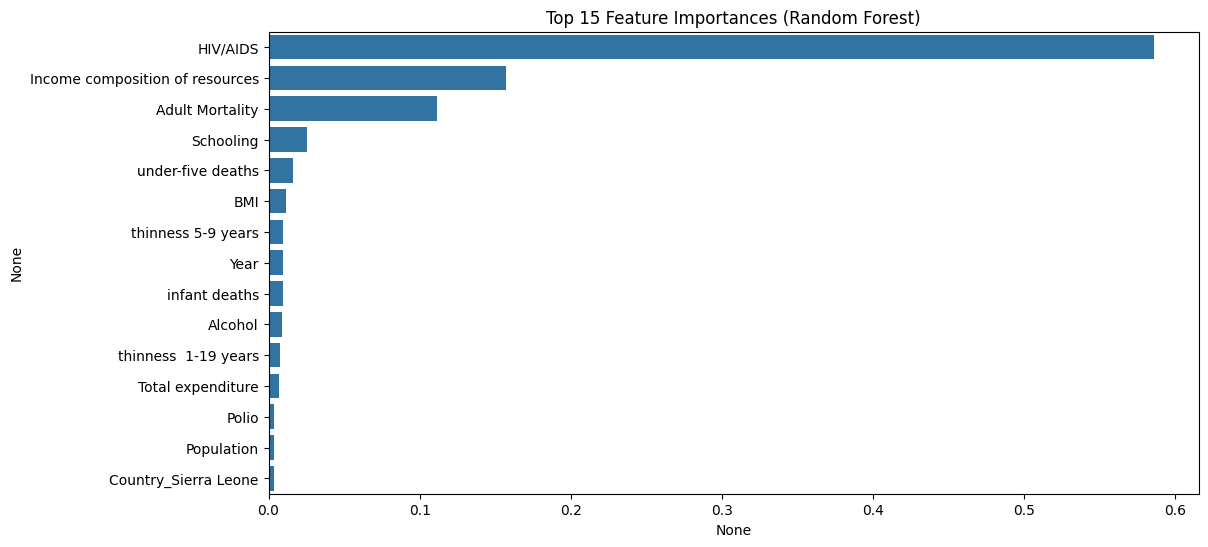

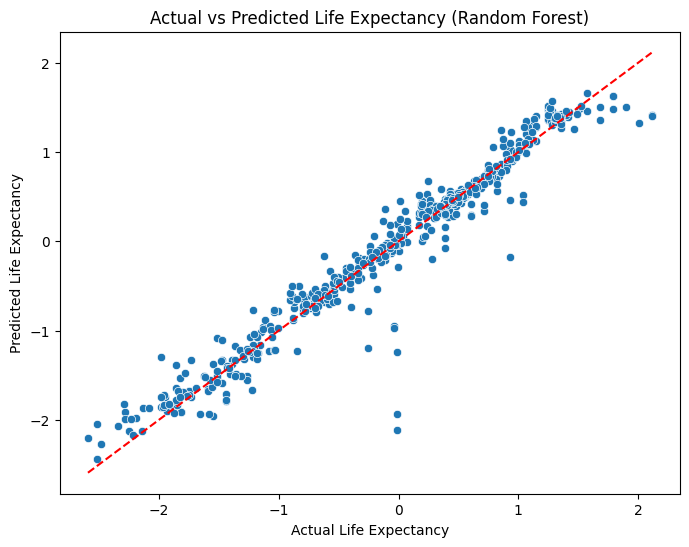

In [ ]:
#MODEL EVALUATION NOTEBOOK

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load saved model metrics
metrics_df = pd.read_csv("../data/model_metrics.csv", index_col=0)
print(metrics_df)

#Model comparison bar chart
metrics_df.plot(kind='bar', figsize=(10,5))
plt.title("Model Comparison: R2, RMSE, MAE")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

#Feature importance r.f
import pickle
from sklearn.ensemble import RandomForestRegressor

# Load feature engineered dataset
df = pd.read_csv("../data/life_expectancy_features.csv")
df.columns = df.columns.str.strip()

#patience is the key, understand it vansh

# Assuming Random Forest was trained in modeling.ipynb
# If you saved it, load using pickle; else re-train quickly
# Here, we just retrain RF quickly for importance
from sklearn.model_selection import train_test_split
target_col = None
for col in df.columns:
    if 'life' in col.lower() and 'expectancy' in col.lower():
        target_col = col
        break

X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance plot
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance[:15], y=feature_importance[:15].index)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.savefig("../images/feature_importance.png", bbox_inches='tight')
plt.show()

#Predictions vs Actuals
y_pred = rf_model.predict(X_test)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.savefig("../images/predicted_vs_actual.png", bbox_inches='tight')
plt.show()



Model Evaluation and Visualization

In this notebook, we visualize model performance and interpret results.  
. Comparing model metrics (R², RMSE, MAE)
. Plotting feature importance
. Plotting actual vs predicted life expectancy
. Deriving insights from visualizations


Insights

- Random Forest identifies top predictors of life expectancy
- Model comparison shows Random Forest performs best among all models
- Visualizations saved in `images/` folder for documentation
